In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
# Download historical stock data for a specific ticker
ticker = 'AAPL'

# Get today's date in the format "YYYY-MM-DD"
today = datetime.today().strftime('%Y-%m-%d')

stock_data = yf.download(ticker, start='1980-12-12', end=today)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
display(stock_data)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800
1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000
1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600
...,...,...,...,...,...
2025-03-19,215.240005,218.759995,213.750000,214.220001,54385400
2025-03-20,214.100006,217.490005,212.220001,213.990005,48862900


In [4]:
stock_close_prices = stock_data['Close']

In [5]:
def evaluate_trade_period(prices, period_length):
    prices_values = stock_close_prices.values
    result_list = []
    for i in range(0, len(prices_values)-period_length+1, 1):
        buy_price = prices_values[i][0]
        sell_price = prices_values[i+period_length-1][0]
        result_list.append(float(sell_price-buy_price))
        
    return result_list

In [6]:
result_list = evaluate_trade_period(stock_close_prices, period_length=1258)
print(stock_close_prices)
print(f"{sum(result_list) = }")

Ticker            AAPL
Date                  
1980-12-12    0.098726
1980-12-15    0.093575
1980-12-16    0.086707
1980-12-17    0.088853
1980-12-18    0.091429
...                ...
2025-03-19  215.240005
2025-03-20  214.100006
2025-03-21  218.270004
2025-03-24  220.729996
2025-03-25  223.750000

[11161 rows x 1 columns]
sum(result_list) = 200221.33676878363


In [7]:
period_lengths, corresponding_results = [], []
for i in range(1, len(stock_close_prices)+1, 1):
    result_list = evaluate_trade_period(stock_close_prices, period_length=i)
    period_lengths.append(i)
    corresponding_results.append(sum(result_list))

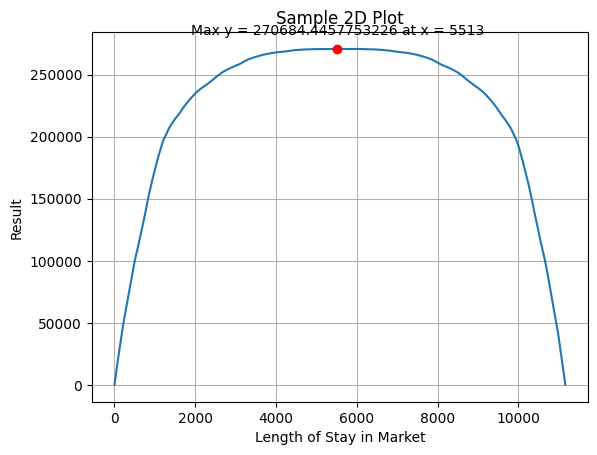

In [8]:
import matplotlib.pyplot as plt

# Creating the plot
plt.plot(period_lengths, corresponding_results)

# Adding title and labels
plt.title("Sample 2D Plot")
plt.xlabel("Length of Stay in Market")
plt.ylabel("Result")

# Enabling grid
plt.grid(True)

# Finding the maximum y value and its corresponding x
max_y = max(corresponding_results)
max_x = period_lengths[corresponding_results.index(max_y)]

# Plotting the maximum y value
plt.plot(max_x, max_y, 'ro')  # 'ro' stands for red circle marker

# Annotating the maximum y value and corresponding x value
plt.annotate(f'Max y = {max_y} at x = {max_x}', 
             (max_x, max_y), 
             textcoords="offset points", 
             xytext=(0, 10), 
             ha='center')

# Display the plot
plt.show()